# Sentiment analysis and topic modeling on Arizona pizza restaurants<a name = "sentimentAnalysisAndTopicModeling"> </a>

1. [Installing and Importing Libraries](#importAndInstall)
2. [Reading Data](#read)
3. [Data Preprocessing / Cleaning](#clean)
4. [Sentiment Analysis - Using VaderSentiment](#vaderSentimentAnalysis)
5. [Topic Modeling for positive reviews using BERT](#bertTopicModelingPositiveReviews)
6. [Topic modeling for negative reviews using BERT](#bertTopicModelingNegativeReviews)
7. [Topic modeling for negative reviews using LDA with TF-IDF](#LDAtopicModelingNegativeReviewsTFIDF)
8. [Topic Modeling for negative reviews using word2vec quantification and LDA](#LDAtopicModelingNegativeReviewsWord2vec)
9. [Comparing - BERT and LDA with TFIDF, Word2Vec (Negative Reviews)](#compare)







# Installing and Importing Libraries<a name = "importAndInstall"></a>

[Go back top](#sentimentAnalysisAndTopicModeling)

In [ ]:
# for performing sentiment analysis using lexicon based approach
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.9 MB/s eta 0:00:00


In [ ]:
import spacy

In [ ]:
import spacy.cli;
spacy.cli.download("en_core_web_lg");

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# for data visualization
import plotly.express as px

In [ ]:
# for performing topic modeling using LDA
!pip uninstall gensim
!pip uninstall pyLDAvis
!pip uninstall spacy
!pip uninstall numpy

Found existing installation: gensim 4.3.2
Uninstalling gensim-4.3.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/gensim-4.3.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/gensim/*
Proceed (Y/n)? y
  Successfully uninstalled gensim-4.3.2
Found existing installation: spacy 3.7.4
Uninstalling spacy-3.7.4:
  Would remove:
    /usr/local/bin/spacy
    /usr/local/lib/python3.10/dist-packages/spacy-3.7.4.dist-info/*
    /usr/local/lib/python3.10/dist-packages/spacy/*
Proceed (Y/n)? y
  Successfully uninstalled spacy-3.7.4
Found existing installation: numpy 1.25.2
Uninstalling numpy-1.25.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.25.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-5007b62f.3.23.dev.so
    /usr/local/lib/python3.10/dist-packag

In [ ]:
# for performing topic modeling using LDA
!pip install gensim==4.3.2
!pip install pyLDAvis==3.4.1
!pip install spacy==3.6.1
!pip install --upgrade numpy==1.24.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 41.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.14 requires spacy<4, which is not installed.
bigframes 0.21.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.0 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 50.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


In [ ]:
# for manipulating dataframes
import pandas as pd

In [ ]:
# for performing topic modeling using BERT
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 71.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 20.1 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.3 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039284 sha256=776e2094d4ade72110ae2d1bd955e0c61060a71a339c046f257ebb1c9594208e
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-

In [ ]:
!pip install --upgrade tensorflow==2.15


In [ ]:
# for performing topic modeling using LDA
from gensim import corpora
from gensim import corpora
from gensim import models
import pyLDAvis
import pyLDAvis.gensim_models
import spacy
import json

# Reading Data<a name = "read"></a>

[Go back top](#sentimentAnalysisAndTopicModeling)

In [ ]:
# loading a datafile from your Google Drive directory
from google.colab import drive
my_path = '/content/drive'
drive.mount(my_path)
# converting datafile into a pandas dataframe
file = open("/content/drive/My Drive/CIS 509/pizza restaurants.csv", "r") # replace this path to open a data file
import pandas as pd
import numpy as np

# reading data about pizza restaurants
pizza_restaurants = pd.read_csv(file) # representing data as a panda dataframe
pizza_restaurants

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,29,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,TN,37188,36.464747,-86.659187,3.5,8,1,{'RestaurantsPriceRange2': '1'},"Pizza, Chicken Wings, Sandwiches, Restaurants","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
1,33,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,10 Rittenhouse Pl,Ardmore,PA,19003,40.006707,-75.289671,3.5,109,1,"{'RestaurantsGoodForGroups': 'True', 'WiFi': ""...","Pizza, Restaurants","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ..."
2,59,JgpnXv_0XhV3SfbfB50nxw,Joe's Pizza,2038 N Dale Mabry Hwy,Tampa,FL,33607,27.960514,-82.506127,4.0,35,0,"{'BusinessParking': ""{'garage': False, 'street...","Restaurants, Pizza","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,189,LGqiubTmpJ-A1L5n7dmc6g,Domino's Pizza,"1525 Lapalco Blvd, # A",Harvey,LA,70058,29.875320,-90.045817,1.5,14,0,"{'RestaurantsGoodForGroups': 'False', 'Caters'...","Restaurants, Sandwiches, Pizza, Chicken Wings","{'Monday': '10:0-1:0', 'Tuesday': '10:0-1:0', ..."
4,191,59jkCUm4yHciKL1KW_1HJA,Roma Pizza & Italian Eatery,1103 Main St,Warrington,PA,18976,40.229527,-75.131090,2.5,25,1,"{'BikeParking': 'False', 'RestaurantsGoodForGr...","Pizza, Restaurants","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5428,148662,WRxBA6HetwyTVtmmlo5nuQ,Fasegeo's,724 Ridge Rd,Sellersville,PA,18960,40.366317,-75.334499,3.5,32,1,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Italian, Pizza, Restaurants","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
5429,148896,qE0vk2A3qD088ZafPZZdJQ,Piccolo Trattoria,144 N Flowers Mill Rd,Langhorne,PA,19047,40.180644,-74.907459,3.5,27,0,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Pizza, Restaurants, Italian","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
5430,149518,3hvwpnzlwPkQ7-AYv4029g,Toto Fresco,"Sharps Run Plz, 175 Rt 70",Medford,NJ,08055,39.903401,-74.833662,3.0,9,0,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Pizza, Restaurants",NaN
5431,150004,9FNcJveP8ZEA42HtM_Kd7g,Papa Murphy's,6887 W Fairview Avenue,Boise,ID,83704,43.618831,-116.267570,3.5,9,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Pizza","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."


In [ ]:
# removing index column from pizza restaurants data since it is not required
pizza_restaurants = pizza_restaurants.drop('Unnamed: 0', axis = 1)
pizza_restaurants

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,sqSqqLy0sN8n2IZrAbzidQ,Domino's Pizza,3001 Highway 31 W,White House,TN,37188,36.464747,-86.659187,3.5,8,1,{'RestaurantsPriceRange2': '1'},"Pizza, Chicken Wings, Sandwiches, Restaurants","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."
1,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,10 Rittenhouse Pl,Ardmore,PA,19003,40.006707,-75.289671,3.5,109,1,"{'RestaurantsGoodForGroups': 'True', 'WiFi': ""...","Pizza, Restaurants","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ..."
2,JgpnXv_0XhV3SfbfB50nxw,Joe's Pizza,2038 N Dale Mabry Hwy,Tampa,FL,33607,27.960514,-82.506127,4.0,35,0,"{'BusinessParking': ""{'garage': False, 'street...","Restaurants, Pizza","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,LGqiubTmpJ-A1L5n7dmc6g,Domino's Pizza,"1525 Lapalco Blvd, # A",Harvey,LA,70058,29.875320,-90.045817,1.5,14,0,"{'RestaurantsGoodForGroups': 'False', 'Caters'...","Restaurants, Sandwiches, Pizza, Chicken Wings","{'Monday': '10:0-1:0', 'Tuesday': '10:0-1:0', ..."
4,59jkCUm4yHciKL1KW_1HJA,Roma Pizza & Italian Eatery,1103 Main St,Warrington,PA,18976,40.229527,-75.131090,2.5,25,1,"{'BikeParking': 'False', 'RestaurantsGoodForGr...","Pizza, Restaurants","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5428,WRxBA6HetwyTVtmmlo5nuQ,Fasegeo's,724 Ridge Rd,Sellersville,PA,18960,40.366317,-75.334499,3.5,32,1,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Italian, Pizza, Restaurants","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
5429,qE0vk2A3qD088ZafPZZdJQ,Piccolo Trattoria,144 N Flowers Mill Rd,Langhorne,PA,19047,40.180644,-74.907459,3.5,27,0,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Pizza, Restaurants, Italian","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
5430,3hvwpnzlwPkQ7-AYv4029g,Toto Fresco,"Sharps Run Plz, 175 Rt 70",Medford,NJ,08055,39.903401,-74.833662,3.0,9,0,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Pizza, Restaurants",NaN
5431,9FNcJveP8ZEA42HtM_Kd7g,Papa Murphy's,6887 W Fairview Avenue,Boise,ID,83704,43.618831,-116.267570,3.5,9,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Pizza","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."


In [ ]:
# reading data about pizza reviews
file = open("/content/drive/My Drive/CIS 509/processed data.csv", "r")
import pandas as pd
import numpy as np


pizza_reviews = pd.read_csv(file) # representing data as a panda dataframe
pizza_reviews

In [ ]:
# dropping 'unnamed' column since it is not needed
pizza_reviews = pizza_reviews.drop("Unnamed: 0", axis = 1)
pizza_reviews

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,Index,Price Range
0,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,Love going here for happy hour or dinner! Gre...,2014-06-27 22:44:01,2014,1165,'2'
1,gTBmyv_0E8LaCujbzP_oOw,5h9JA231vPilNAIjHxwGng,lj-E32x9_FA7GmUrBGBEWg,5,0,0,0,My friends at work (connoisseurs of good food ...,2014-08-24 19:24:26,2014,1165,'2'
2,eaZ4tpxGaZ-_STjRs_Qs8Q,c1fSI6Dv5lybr0AJh67e7w,lj-E32x9_FA7GmUrBGBEWg,4,0,0,0,"Great service, relaxing atmosphere and the foo...",2015-09-24 15:01:11,2015,1165,'2'
3,NUI4r6IguPlYbp-hRHDXBg,st-q1iyW3sJm-v0OCrheoQ,lj-E32x9_FA7GmUrBGBEWg,5,2,0,0,I went to Brio for the first time on Wednesday...,2015-10-17 04:56:25,2015,1165,'2'
4,gJ7fifhiME55IvK6GmYkjA,9qBdzBzoDxLFSMhhGrTWJg,lj-E32x9_FA7GmUrBGBEWg,4,1,0,1,I usually steer clear of the chain restaurants...,2016-01-04 16:56:32,2016,1165,'2'
...,...,...,...,...,...,...,...,...,...,...,...,...
250691,PEXY4dgEnut6NnERPIWq9Q,MZztG-v1uIdu97oQ-o1TKw,1C3wyFqh6WT1dr4Qx2MVmQ,1,0,0,0,I wish when I placed the order online it would...,2016-10-11 02:40:28,2016,142280,Not Available
250692,yC9pkyBMOzDVLUhGz29vTQ,ufL3WnBjYbznPrWoTmHwmA,9CJAii3B4yi5qYpeYE1Kxw,3,0,1,1,one thing that real pisses me off is any place...,2015-03-14 03:27:53,2015,147444,'2'
250693,jpih2-xPqqaHDUivW8Rdug,iS94VPcHINDyrgFkV0J9yQ,B3JCfkoBQilfyMrYza_Ilg,5,1,0,1,This place is great! My neighbors and I all ve...,2018-10-31 18:34:32,2018,136071,Not Available
250694,mif-uUZ65h7S6n6LW5Cr4A,3WWEuDYQ3ssQl1cfl5ui8w,B3JCfkoBQilfyMrYza_Ilg,4,1,1,1,We went to hear one of our favorite bands. Was...,2014-12-27 17:50:32,2014,136071,Not Available


# Data Preprocessing / Cleaning<a name = "clean"></a>

[Go back top](#sentimentAnalysisAndTopicModeling)

In [ ]:
# removing stop words and performing lemmatization as a part of data cleaning using spacy

import spacy #load spacy
nlp = spacy.load("en_core_web_lg", disable=['parser', 'tagger', 'ner'])
def normalize(review, lowercase, remove_stopwords):
    if lowercase:
        review = review.lower()
    doc = nlp(review)
    lemmatized = list()
    for token in doc:
        if not remove_stopwords or (remove_stopwords and not token.is_stop):
            lemmatized.append(token.lemma_)
    return " ".join(lemmatized)
pizza_reviews['processed_text'] = pizza_reviews['text'].apply(normalize, lowercase=True, remove_stopwords=True)

/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [ ]:
# saving the new file so that we can use it later
pizza_reviews.to_csv("pizza_reviews_processed.csv", index = False)

# Sentiment Analysis using VaderSentiment<a name = "vaderSentimentAnalysis"></a>

[Go back top](#sentimentAnalysisAndTopicModeling)

In [ ]:
# performing sentiment analysis using vader sentiment - lexicon based approach

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

def get_vader_sentiment(review):
  sent = sentiment.polarity_scores(review)
  if sent['compound'] >= 0.05:
    return 'Positive'
  elif sent['compound'] <= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

pizza_reviews['vader_sentiment'] = pizza_reviews['processed_text'].apply(get_vader_sentiment)
pizza_reviews[['text', 'vader_sentiment']]

,text,vader_sentiment
0,Love going here for happy hour or dinner! Gre...,Positive
1,My friends at work (connoisseurs of good food ...,Positive
2,"Great service, relaxing atmosphere and the foo...",Positive
3,I went to Brio for the first time on Wednesday...,Positive
4,I usually steer clear of the chain restaurants...,Positive
...,...,...
250691,I wish when I placed the order online it would...,Positive
250692,one thing that real pisses me off is any place...,Negative
250693,This place is great! My neighbors and I all ve...,Positive
250694,We went to hear one of our favorite bands. Was...,Positive


In [ ]:
# saving the dataset with the predicted sentiments as a csv file so that we can use it later
pizza_reviews.to_csv("pizza_reviews_processed_sent_analysis.csv", index = False)

In [ ]:
# plotting the frequency of positive, negative and neutral sentiments

sentiment_dist = pizza_reviews['vader_sentiment'].value_counts().to_frame().reset_index()
sentiment_dist
fig = px.bar(sentiment_dist, x='index', y='vader_sentiment', title = "Sentiment Analysis")
fig.update_layout(
    xaxis_title='Sentiment',
    yaxis_title='Number of reviews'
)
fig.show()

In [ ]:
# separating the positive, negative and neutral reviews

poitive_reviews = pizza_reviews[pizza_reviews['vader_sentiment']=='Positive']
negative_reviews = pizza_reviews[pizza_reviews['vader_sentiment']=='Negative']
neutral_reviews = pizza_reviews[pizza_reviews['vader_sentiment']=='Neutral']

In [ ]:
# saving the positive, negative, and neutral sentiments as csv files so that we can use it later
poitive_reviews.to_csv("positive_reviews.csv", index = False)
negative_reviews.to_csv("negative_reviews.csv", index = False)
neutral_reviews.to_csv("neutral_reviews.csv", index = False)

# Topic Modeling for positive reviews using BERT<a name = "bertTopicModelingPositiveReviews"></a>

[Go back top](#sentimentAnalysisAndTopicModeling)

In [ ]:
import pandas as pd
import csv

# reading the positive reviews dataset.

# Specify the path to CSV file
csv_file_path = '/content/positive_reviews.csv'

# Specify the row number to skip - this row has some characters due to which we could not load the csv file into a pandas dataframe, thus we want to skip this row
row_to_skip = 3128

# Initialize an empty list to store rows
rows_to_process = []

# Open the CSV file
with open(csv_file_path, 'r') as csv_file:
    # Create a CSV reader object
    csv_reader = csv.reader(csv_file)

    # Iterate through the rows
    for row_number, row in enumerate(csv_reader, start=1):
        # Skip the specified row
        if row_number == row_to_skip:
            continue

        # Add the remaining rows to the list
        rows_to_process.append(row)

# Create a DataFrame from the remaining rows
positive_reviews = pd.DataFrame(rows_to_process)

# renaming the columns
positive_reviews.columns = ["review_id", "user_id", "business_id", "stars", "useful", "funny", "cool", "text", "date", "year", "index", "Price Range", "processed_text", "vader_sentiment"]
positive_reviews = positive_reviews.drop(0)



In [ ]:
# using bert to process positive reviews
%%time
from bertopic import BERTopic
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', calculate_probabilities = False)
topics, _ = model.fit_transform(positive_reviews.processed_text)

2024-02-23 01:33:29,057 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/6889 [00:00<?, ?it/s]

2024-02-23 02:14:35,504 - BERTopic - Embedding - Completed ✓
2024-02-23 02:14:35,506 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-23 02:18:52,223 - BERTopic - Dimensionality - Completed ✓
2024-02-23 02:18:52,231 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-23 02:19:24,714 - BERTopic - Cluster - Completed ✓
2024-02-23 02:19:24,785 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-23 02:19:37,435 - BERTopic - Representation - Completed ✓


CPU times: user 47min 50s, sys: 49.5 s, total: 48min 40s
Wall time: 46min 28s


In [ ]:
# getting the topic, its name, its representation and documents that represent that topic
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq

Number of topics: 514


,Topic,Count,Name,Representation,Representative_Docs
0,-1,139755,-1_pizza_food_place_good,"[pizza, food, place, good, ordered, like, grea...",[time . mod california understand affiliates ....
1,0,5118,0_salad_salads_buffet_caesar,"[salad, salads, buffet, caesar, dressing, gree...",[pizza salads excellent prices great . deliv...
2,1,5083,1_beer_beers_selection_tap,"[beer, beers, selection, tap, craft, bar, draf...","[pizza good , beers drinks served . selection ..."
3,2,3423,2_food_atmosphere_service_great,"[food, atmosphere, service, great, staff, pric...","[eat times week . food delicious , portions bi..."
4,3,3255,3_wings_wing_buffalo_delivery,"[wings, wing, buffalo, delivery, hot, mild, bo...",[got food hour good got wings good pizza bette...
...,...,...,...,...,...
509,508,10,508_vodka_roxi_stingiest_wow,"[vodka, roxi, stingiest, wow, alla, germaine, ...",[stopped hang good choice ! drink .... roxi ...
510,509,10,509_downingtown_pounded_mylitene_anthony,"[downingtown, pounded, mylitene, anthony, busi...","[finally , great casual italian restaurant dow..."
511,510,10,510_dashi_boatwright_lever_solidify,"[dashi, boatwright, lever, solidify, norwegian...",[love place ! times loved . sandwiches good . ...
512,511,10,511_dreams_roman_dream_pizzeria,"[dreams, roman, dream, pizzeria, 1love, jiro, ...","[place fantastic . real pizza snob , majorit..."


In [ ]:
# visualizing the top 5 words in the top 10 topics for positive reviews
model.visualize_barchart(top_n_topics=10)

In [ ]:
# visualizing the hierarchy of the top 30 topics for positive reviews
model.visualize_hierarchy(top_n_topics=30)

In [ ]:
# visualizing the intertopic distance - the relationship / overlap between the topics identified for positive reviews
model.visualize_topics(top_n_topics=10)

# Topic modeling for negative reviews using BERT<a name = "bertTopicModelingNegativeReviews"></a>

[Go back top](#sentimentAnalysisAndTopicModeling)

In [ ]:
# reading the negative reviews
negative_reviews = pd.read_csv("negative_reviews.csv")

In [ ]:
# using BERTopic to perform topic modeling on negative reviews

%%time
from bertopic import BERTopic
model_negative = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', calculate_probabilities = False)
topics_negative, _ = model_negative.fit_transform(negative_reviews.text)

2024-02-19 17:35:05,454 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/844 [00:00<?, ?it/s]

2024-02-19 17:46:43,823 - BERTopic - Embedding - Completed ✓
2024-02-19 17:46:43,825 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-19 17:47:43,345 - BERTopic - Dimensionality - Completed ✓
2024-02-19 17:47:43,351 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-19 17:47:50,473 - BERTopic - Cluster - Completed ✓
2024-02-19 17:47:50,489 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-19 17:47:54,735 - BERTopic - Representation - Completed ✓


CPU times: user 12min 44s, sys: 8.31 s, total: 12min 52s
Wall time: 12min 50s


In [ ]:
# getting the number of topics found and their information - name, representation and the representative documents
freq_neg = model_negative.get_topic_info()
print("Number of topics: {}".format( len(freq_neg)))
freq_neg

Number of topics: 109


,Topic,Count,Name,Representation,Representative_Docs
0,-1,16709,-1_the_and_to_was,"[the, and, to, was, it, pizza, we, of, for, in]",[I always thought I wouldn't be the person to ...
1,0,2480,0_order_delivery_called_to,"[order, delivery, called, to, they, me, phone,...","[Normally, I love this place. They occasionall..."
2,1,546,1_called_delivery_phone_order,"[called, delivery, phone, order, call, pizza, ...",[I am very upset now with the business on 2 oc...
3,2,518,2_we_our_us_waitress,"[we, our, us, waitress, table, were, to, was, ...",[We sat down and ordered the cheese curds app ...
4,3,460,3_stars_give_star_could,"[stars, give, star, could, would, zero, if, fo...","[If ZERO stars was an option, that's what this..."
...,...,...,...,...,...
104,103,10,103_associate_ksr_line_order,"[associate, ksr, line, order, ordering, pizzas...",[I've been ordering the same sandwich for the ...
105,104,10,104_water_soda_cup_buy,"[water, soda, cup, buy, fountain, slice, tap, ...",[Just visited Villa Pizza across from gate B6 ...
106,105,10,105_sandwich_meatball_meatballs_impossible,"[sandwich, meatball, meatballs, impossible, ph...",[Just paid 7.00 for a meatball parm sandwich -...
107,106,10,106_cheese_crust_slice_greasy,"[cheese, crust, slice, greasy, under, adolesce...",[Under the massive gobs of cheap cheese is a p...


In [ ]:
# visualizing the top 5 words of the top 10 topics for negative reviews
model_negative.visualize_barchart(top_n_topics=10)

1. Topic modeling using BERT does not give us good results.
2. For topic modeling for positive reviews, BERT model was only able to identify 2 topics and the 2 topics were not even coherent - it consisted of a lot of stop words.
3. The topic modeling for negative reviews were better:

Topic 0: **Order Delivery Issues**. Deals with problems related to order deliveries. \
Topic 1: **Phone Communication Problems**. Deals with problems with the way pizza restaurant takes calls. It could be related to them not answering the call or them not talking properly to the customers. \
Topic 2: **Restaurant tables and waitresses**.  Deals with problems related to the restaurant tables and waitresses. The tables may not be available or the there were not enough waitresses or the waitresses did not treat the customers on the table well. \
Topic 5: **Bad Pizza Crust**. deals with bad pizza crust. \
Topic 6 and 9: **Poor salad and dressing**. Deals with bad salad and dressing \
Topic 7 and 8: **Subpar wings**. Deals with bad wings \
Topic 6, 7, 8 and 9 highlight that even if the pizza is good, if other dishes in the restaurant are bad, the overall impression of the restaurant reduces. \

Not all topics were interpretable.


# Topic modeling for negative reviews using LDA with TF-IDF<a name = "LDAtopicModelingNegativeReviewsTFIDF"></a>

[Go back top](#sentimentAnalysisAndTopicModeling)

In [ ]:
# preprocessing documents by removing stop words, lemmatizing them and quanifying it using TF-IDF.
# using spacy's pre trained model to do this.

nlp = spacy.load("en_core_web_lg")

documents = []
for index, row in negative_reviews.iterrows():
    text = row["text"]
    doc = nlp(text)
    if len(doc) <= 5: # exclude comments with five or less than five words
        pass
    else:
        documents.append(text.replace("!","").replace(".","").replace("?","").replace("[","").replace("]","").replace(")","").replace("(","").replace("  "," ").replace('\"'," ").replace("\'"," ").replace("/"," ").replace("\\"," "))

processed_documents = [] # list for storing tokenized documents
for document in documents:
    temp_list = [] # list for storing tokens in a document
    for token in nlp(document):
        if token.is_stop is True: # check whether the provided token is a stop word and decide whether to disregard it
            pass
        elif not nlp.vocab.has_vector(str(token)): # check whether the provided token is in a vocabulary
            pass
        else:
            temp_list.append(str(token.lemma_)) # lemmatize
    processed_documents.append(temp_list)
dictionary = corpora.Dictionary(processed_documents) # index words with integers
corpus = [dictionary.doc2bow(sentence) for sentence in processed_documents] # TF representation
tfidf = models.TfidfModel(corpus) # Fit TF-IDF
corpus_tfidf = tfidf[corpus] # Transform "corpus" into TF-IDF

In [ ]:
# saving these locally so we can directly use it and run it again later.
from gensim.corpora import MmCorpus
MmCorpus.serialize('corpus_tfidf.mm', corpus_tfidf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# saving these locally so we can directly use it and run it again later.
dictionary.save('dictionary.dict')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# saving these locally so we can directly use it and run it again later.
import pickle


with open('processed_documents.pkl', 'wb') as file:
    pickle.dump(processed_documents, file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# trying to find out the appropriate number of topics for negative reviews.
from gensim.models import CoherenceModel
num_of_topics = []
coherence = []
for k in range(29):
    lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=k+2) # train LDA model;
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_documents, dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-20-34d298b00ada>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


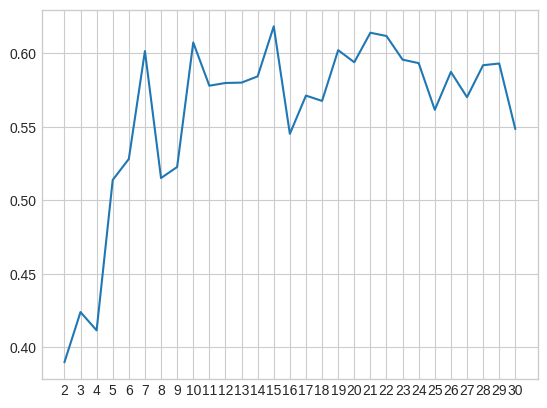

In [ ]:
# Visualizaing coherence measures over different values of k (k is the number of topics)
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

In [ ]:
# training an lda model with the appropriate number of topics - 15 topics gave us the highest coherent score
lda_model = models.ldamodel.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=15) # train LDA model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# saving the model so we can use it to run it later
lda_model.save('lda_model_neg_tfidf')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# interpreting the topics

for topic in lda_model.show_topics(num_topics=15, num_words=5):# show 5 most important words for each topic
    print(topic)

for doc, topic_dist in zip(documents, lda_model[corpus_tfidf]): # print out topic distribution for each document in the corpus
    print(doc, ": ", topic_dist)
    break

(0, '0.009*"order" + 0.009*"minute" + 0.008*"," + 0.008*"wait" + 0.008*"call"')
(1, '0.008*"everytime" + 0.007*"hawaiian" + 0.006*"generic" + 0.005*"consideration" + 0.005*"nugget"')
(2, '0.006*"boss" + 0.005*"female" + 0.005*"ziti" + 0.004*"prove" + 0.004*"register"')
(3, '0.004*"Waitress" + 0.004*"beer" + 0.004*"," + 0.004*"bar" + 0.004*"favor"')
(4, '0.011*"bank" + 0.007*"Mother" + 0.006*"somebody" + 0.006*"safe" + 0.006*"wake"')
(5, '0.006*"parm" + 0.005*"Stromboli" + 0.005*"dirty" + 0.004*"chicken" + 0.004*"eggplant"')
(6, '0.011*"GrubHub" + 0.006*"random" + 0.006*"thinking" + 0.006*"Mozzarella" + 0.006*"careless"')
(7, '0.010*"pizza" + 0.009*"," + 0.007*"cheese" + 0.006*"order" + 0.006*"s"')
(8, '0.009*"Grubhub" + 0.006*"american" + 0.006*"exception" + 0.006*"click" + 0.005*"rough"')
(9, '0.005*"afraid" + 0.005*"tooth" + 0.005*"eh" + 0.005*"sticky" + 0.005*"crab"')
(10, '0.008*"leftover" + 0.007*"Philadelphia" + 0.006*"closing" + 0.005*"inattentive" + 0.005*"e"')
(11, '0.008*"Hor

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1. Topic 0: Waiting time and phone communication problems
2. Topic 1: Generic or limited menu
3. Topic 3: Waitress problems
4. Topic 4: Dirty food
5. Topic 6: Being careless
6. Topic 10 and 13: Closing time soon
7. Topic 14: Lukewarm and soggy food

Only 7 topics were interpretable

# Topic Modeling for negative reviews using word2vec quantification and LDA<a name ="LDAtopicModelingNegativeReviewsWord2vec"></a>

[Go back top](#sentimentAnalysisAndTopicModeling)

In [ ]:
# installing the libraries
import nltk
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from gensim.models import LdaModel, Word2Vec
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string


# Tokenization and preprocessing by removing stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    return tokens

negative_reviews['tokens'] = negative_reviews['text'].apply(preprocess_text)

# Train a Word2Vec model
word2vec_model = Word2Vec(sentences=negative_reviews['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Create a Gensim Dictionary and Corpus
dictionary = Dictionary(negative_reviews['tokens'])
corpus = [dictionary.doc2bow(tokens) for tokens in negative_reviews['tokens']]

# Convert Word2Vec embeddings to bag-of-words representation
word2vec_bow = [dictionary.doc2bow(tokens) for tokens in negative_reviews['tokens']]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# saving them so we can use it later
from gensim.corpora import MmCorpus
MmCorpus.serialize('word2vec_bow.mm', word2vec_bow)
dictionary.save('dictionary.dict')
import pickle
with open('processed_documents.pkl', 'wb') as file:
    pickle.dump(negative_reviews['tokens'], file)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# deciding appropriate number of topics by measuring coherence scores for different values of
from gensim.models import CoherenceModel
num_of_topics = []
coherence = []
for k in range(29):
    lda_model = models.ldamodel.LdaModel(word2vec_bow, id2word=dictionary, num_topics=k+2) # train LDA model;
    coherence_model_lda = CoherenceModel(model=lda_model, texts = negative_reviews['tokens'], dictionary=dictionary, coherence='c_v') # calculate coherence measures
    coherence_lda = coherence_model_lda.get_coherence()
    num_of_topics.append(k+2)
    coherence.append(coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-10-34d298b00ada>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


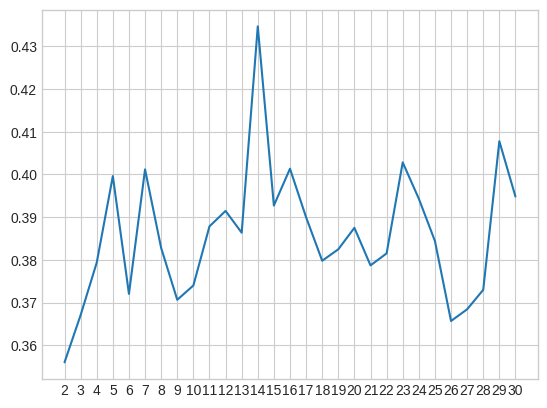

In [ ]:
# Visualizaing coherence measures over different values of k (k is the number of topics)
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(num_of_topics, coherence) # x-axis = K, y-axis = coherece measures
plt.xticks(num_of_topics) # To label x-axis with K values
plt.show()

In [ ]:
# Train an LDA model using Word2Vec embeddings using the appropriate number of topics - we get the highest coherent score with 14 topics
lda_model = models.ldamodel.LdaModel(word2vec_bow, id2word=dictionary, num_topics=14)

# Print topics and their top keywords
for topic_id, topic_keywords in lda_model.print_topics(num_topics=-1, num_words=5):
    print(f'Topic {topic_id}: {topic_keywords}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: 0.037*"order" + 0.024*"pizza" + 0.020*"called" + 0.017*"n't" + 0.016*"delivery"
Topic 1: 0.073*"service" + 0.043*"food" + 0.037*"terrible" + 0.023*"horrible" + 0.021*"rude"
Topic 2: 0.082*"..." + 0.043*".." + 0.019*"pizza" + 0.016*"garlic" + 0.015*"...."
Topic 3: 0.026*"salad" + 0.023*"pizza" + 0.021*"place" + 0.018*"food" + 0.011*"wings"
Topic 4: 0.026*"us" + 0.018*"food" + 0.016*"service" + 0.016*"minutes" + 0.016*"n't"
Topic 5: 0.049*"n't" + 0.021*"food" + 0.010*"'s" + 0.009*"place" + 0.008*"italian"
Topic 6: 0.022*"bar" + 0.012*"staff" + 0.012*"beer" + 0.010*"n't" + 0.010*"night"
Topic 7: 0.018*"imo" + 0.017*"olives" + 0.012*"st." + 0.010*"'s" + 0.010*"louis"
Topic 8: 0.014*"food" + 0.013*"pasta" + 0.012*"place" + 0.010*"'s" + 0.009*"restaurant"
Topic 9: 0.023*"n't" + 0.019*"pizza" + 0.016*"'s" + 0.010*"order" + 0.009*"time"
Topic 10: 0.088*"pizza" + 0.020*"cheese" + 0.015*"sauce" + 0.015*"n't" + 0.013*"'s"
Topic 11: 0.025*"food" + 0.021*"ordered" + 0.019*"chicken" + 0.019

1. 14 topics were considered to be the most appropriate after quantifying the data using word2vec
2. Topic 0: Delivery and phone communication issues.
3. Topic 1: Terrible food and service
4. Topic 9: Long waiting time for order placed

Only 3 topics were interpretable.  

# Comparing  - BERT and LDA with TFIDF, Word2Vec (Negative Reviews)<a name = "compare"></a>

[Go back top](#sentimentAnalysisAndTopicModeling)

## BERT:
1. Identified 108 topics.
2. 8 topics were interpretable.

## LDA with TF-IDF
1. Identified 15 topics to be the most appropriate
2. 7 topics were interpretable.

## LDA with Word2Vec
1. Identified 14 topics to be the most appropriate
2. 3 topics were interpretable

## Common topics identifed by all 3 approaches:
1. Delivery issues
2. Phone communication problems
3. Bad food

## Unique topics identfied by BERT:
1. Bad pizza crust
2. Poor salads and dressings
3. Subpar wings

## Unique topics identified by LDA with TF-IDF
1. Being careless
2. Closing time soon

## Unique topics identified by LDA with word2vec
1. Long waiting time for order placed